In [114]:
import pandas as pd
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy

import time
from sklearn.decomposition import PCA

from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors, cross_validation

from matplotlib.colors import ListedColormap

import statsmodels.api as sm
from sklearn import linear_model

from matplotlib import style 
style.use('ggplot')

from sklearn.cluster import KMeans


In [2]:
data = pd.DataFrame.from_csv("/Users/raphaelpresberg/Desktop/Stevens/BIA 652 Multivariate Data Analysis/NYC_Taxis/NYC_taxis.csv")


#data understanding
data.head()
data.tail(10)
sLength = len(data['Pickup Time'])
data['Trip time'] = pd.Series(np.random.randn(sLength), index = data.index)
data['new_col'] = range(0, sLength)
data = data.reset_index()
data['new_col'] = data.index
print(data.head())
data.info()
data.describe()



  Pickup Date  Pickup Time  Dropoff Date Dropoff Time Vendor ID  \
0  2015-01-01  0:00:00.000      20150101  0:00:00.000       VTS   
1  2015-01-01  0:00:00.000      20150101  0:00:00.000       VTS   
2  2015-01-01  0:00:00.000      20150101  0:11:26.000       CMT   
3  2015-01-01  0:00:01.000      20150101  0:03:49.000       CMT   
4  2015-01-01  0:00:03.000      20150101  0:10:50.000       VTS   

   Passenger Count  Trip Distance (in miles)  Pickup Longitude  \
0                1                      1.68        -73.991547   
1                3                      1.56        -74.001320   
2                5                      4.00        -73.971436   
3                1                      0.80        -73.860847   
4                1                      1.58        -73.987579   

   Pickup Latitude  Rate Code   ...    Dropoff Latitude  Payment Type  \
0        40.750069          1   ...            0.000000           CSH   
1        40.729057          1   ...           40.71966

,Dropoff Date,Passenger Count,Trip Distance (in miles),Pickup Longitude,Pickup Latitude,Rate Code,Dropoff Longitude,Dropoff Latitude,Fare Amount,Surcharge,MTA Tax,Tip Amount,Tolls Amount,Total Amount,Trip time,new_col
count,7.273100e+05,727310.000000,7.273100e+05,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.000000,727310.00000
mean,2.015010e+07,1.783453,1.959882e+01,-72.425570,39.897802,1.045149,-72.440314,39.907709,12.417926,0.329787,0.497078,1.280769,0.258895,15.081973,-0.001385,363654.50000
std,5.124534e-01,1.361950,1.407088e+04,10.585702,5.831541,0.628995,10.535020,5.824130,11.253458,0.344260,0.040088,2.473669,1.307798,13.160194,1.000456,209956.45648
min,2.015010e+07,0.000000,0.000000e+00,-79.732277,0.000000,1.000000,-77.459442,-9.029157,-100.000000,-1.000000,-0.500000,-92.420000,-8.000000,-100.300000,-5.241918,0.00000
25%,2.015010e+07,1.000000,1.090000e+00,-73.991249,40.733257,1.000000,-73.990837,40.732002,6.500000,0.000000,0.500000,0.000000,0.000000,8.000000,-0.676781,181827.25000
50%,2.015010e+07,1.000000,1.830000e+00,-73.981209,40.752293,1.000000,-73.979294,40.752449,9.000000,0.500000,0.500000,0.000000,0.000000,11.150000,-0.000960,363654.50000
75%,2.015010e+07,2.000000,3.440000e+00,-73.965103,40.767391,1.000000,-73.959824,40.768417,14.000000,0.500000,0.500000,1.950000,0.000000,16.800000,0.673415,545481.75000
max,2.015012e+07,9.000000,1.200000e+07,0.000000,50.769863,99.000000,85.274025,459.533325,3005.500000,9.000000,0.500000,850.000000,89.750000,3006.350000,4.710983,727309.00000


In [3]:

def basics_info (initial_numpy_array):
    print("Mean: ", np.mean(initial_numpy_array))
    #median cost of a trip without @ without taxes
    print("Median: ", np.median(initial_numpy_array))
    #The numpy.ptp() function returns the range (maximum-minimum) of values along an axis.
    print("Range: ", np.ptp(initial_numpy_array))
    #standard deviation & variance
    print("SD: ", np.std(initial_numpy_array))
    print("Variance: ", np.var(initial_numpy_array))
    plt.plot(initial_numpy_array)
    plt.show() 


#removing outliers and compute the distribution plot

def removeOutliers(x):
    a = np.array(x)
    outlierConstant = 1
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
    return resultList

def prob_plot(variable):
    
    mu = np.mean(variable)
    sigma = np.std(variable)

    mu, sigma = mu, sigma
    x = mu + sigma * np.array(variable)

    # the histogram of the data
    n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.95)


    plt.xlabel("Prob ")
    plt.ylabel('Probability')
    plt.title('Proba Plot')
   # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    plt.axis([20, 190, 0, 0.03])
    plt.grid(True)
    plt.show()
    



Mean:  15.0819733951
Median:  11.15
Range:  3106.65
SD:  13.1601852748
Variance:  173.190476467


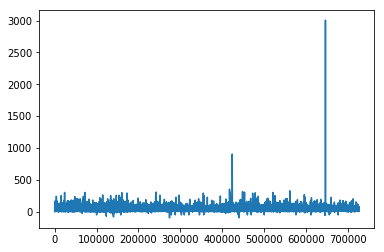

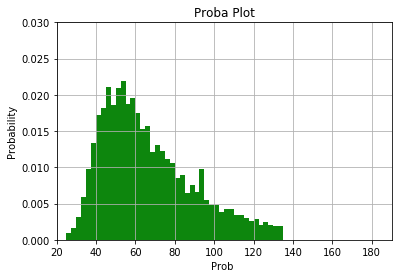

In [4]:
#*******************************************
#STUDY FOR TOTAL AMOUNT 
#*******************************************
total_amount = data.as_matrix(columns = data.columns[19:20])

basics_info(total_amount)
good_total_amount = removeOutliers(total_amount)
prob_plot(good_total_amount)


In [ ]:
#*******************************************
#STUDY FOR FARE AMOUNT 
#*******************************************

fare_amount = data.as_matrix(columns=data.columns[17:118])

basics_info(fare_amount)
good_fair_amount = removeOutliers(data[['Fare Amount']])
prob_plot(good_fair_amount)


In [ ]:
#*******************************************
#STUDY FOR TIP AMOUNT 
#*******************************************

tip_amount = data.as_matrix(columns=data.columns[14:15])

basics_info(tip_amount)
good_tip_amount = removeOutliers(tip_amount)
prob_plot(good_tip_amount)


In [ ]:
x = total_amount
pca = PCA(n_components=1)
pca.fit(x)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)  



In [ ]:
#a = pickup time
#b = dropoff time
a = data.as_matrix(columns=data.columns[0:1])
b = data.as_matrix(columns=data.columns[2:3])
c = "0:00:00.000"
a
#x = a[0]
c.split(':')


#https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9

In [ ]:
#%H # ==> heure pour heures de 1 a 23
#%M # ==> minutes 

# string to time tuple
time_str = "17:53:59"
time_tuple = time.strptime(time_str, "%H:%M:%S")
print(time_tuple)
x= time_tuple[3:5]
nb_minutes = x[0]*60 + x[1]
nb_minutes

In [ ]:
#if (drop off date = pickup date):
#    Dropoff Time - Pickup Time
#else: 
#    abs_value =abs(DT - PT)
#    1440 - abs_value

data.head()



In [338]:
list(data)

['Pickup Date',
 'Pickup Time',
 'Dropoff Date',
 'Dropoff Time',
 'Vendor ID',
 'Passenger Count',
 'Trip Distance (in miles)',
 'Pickup Longitude',
 'Pickup Latitude',
 'Rate Code',
 'Store and Forward Flag',
 'Dropoff Longitude',
 'Dropoff Latitude',
 'Payment Type',
 'Fare Amount',
 'Surcharge',
 'MTA Tax',
 'Tip Amount',
 'Tolls Amount',
 'Total Amount',
 'Trip time',
 'new_col']

In [5]:
#Tip Analysis 
#Question: generous/not generous customer

#variable to use ==> total amount, passenger count, trip distance, rate code, surcharge
#Output ==> tip amount

tip_data = data[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Rate Code', 'Surcharge', 'Tip Amount']]
tip_data
tip_data.describe()

#Creating train and test dataset (2/3 - 1/3)
msk = np.random.rand(len(tip_data)) < 0.66
tip_train = tip_data[msk]
tip_test = tip_data[~msk]


#2 categories to classify ==> Not Generous, Generous

#tip_data["Generous or not"] = 0
tip_data.info()
tip_data.head()
tip_data.tail()
#neigh = KNeighborsClassifier(n_neighbors=3)
#neigh.fit(X, y) 
#KNeighborsClassifier(...)
#print(neigh.predict([[1.1]]))

#print(neigh.predict_proba([[0.9]]))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727310 entries, 0 to 727309
Data columns (total 6 columns):
Total Amount                727310 non-null float64
Passenger Count             727310 non-null int64
Trip Distance (in miles)    727310 non-null float64
Rate Code                   727310 non-null int64
Surcharge                   727310 non-null float64
Tip Amount                  727310 non-null float64
dtypes: float64(4), int64(2)
memory usage: 33.3 MB


,Total Amount,Passenger Count,Trip Distance (in miles),Rate Code,Surcharge,Tip Amount
727305,7.95,1,0.62,1,0.5,1.65
727306,6.30,2,0.80,1,0.5,0.00
727307,10.30,1,2.19,1,0.5,0.00
727308,13.80,1,3.50,1,0.5,0.00
727309,69.60,1,16.84,2,0.0,11.47


In [334]:
#https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

#***************************************************************************************************************
#Multiple Regression 
#***************************************************************************************************************


# WITH STATSMODELS

target = pd.DataFrame(data[['Tip Amount']])

df = pd.DataFrame( data[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Rate Code', 'Surcharge']])

#Multiple Regression 
#Prediction of the tip the customer will give in function of the other variables we selected 
X = df[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Rate Code', 'Surcharge']]
y = target["Tip Amount"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

model.summary()

#Analysis: R^2 = 0.451 means this model explain only 45,1% of the variance in our dependent variable


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Tip Amount   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                 1.194e+05
Date:                Tue, 10 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:23:14   Log-Likelihood:            -1.5591e+06
No. Observations:              727310   AIC:                         3.118e+06
Df Residuals:                  727305   BIC:                         3.118e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Total Amount                 0.1039      0.000    571.609      0.000       0.104       0.104
Passenger Count             -0.0502      0.002    -32.171      0.000      -0.053      -0.047
Trip Distance (in miles) -3.052e-08   1.72e-07     -0.177      0.859   -3.68e-07    3.07e-07
Rate Code                   -0.1811      0.003    -54.792      0.000      -0.188      -0.175
Surcharge                    0.0402      0.006      6.227      0.000       0.028       0.053
==============================================================================
Omnibus:                  2575718.182   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   20341246372818.117
Skew:                          68.946   Prob(JB):                         0.00
Kurtosis:                   25910.677   Cond. No.                     3.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
# WITH SCICKIT

target = pd.DataFrame(data[['Tip Amount']])

df = pd.DataFrame( data[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Rate Code', 'Surcharge']])

#Multiple Regression 
#Prediction of the tip the customer will give in function of the other variables we selected 
X = df[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Rate Code', 'Surcharge']]
y = target["Tip Amount"]

lm = linear_model.LinearRegression()
model = lm.fit(X,y)

predictions = lm.predict(X)

print("prediction", predictions)

# percentage of explained variance of the predictions
print("R^2 (percentage of variance): " ,lm.score(X,y))

#coefficients for the predictors
print("coef: ", lm.coef_)

# intercept for the predictors
print("intercept", lm.intercept_)



prediction [ 0.82667978  0.60626854  1.14334155 ...,  0.82603476  1.19394272
  6.87608117]
R^2 (percentage of variance):  0.304141587458
coef:  [  1.05116571e-01  -3.10456909e-02  -2.46506861e-08  -1.31452592e-01
   1.03826548e-01]
intercept -0.146080857344


In [113]:
#Test prediction of multiple regression

test_prediction = np.array([3, 1, 0.4, 0.5, 0])
test_prediction = test_prediction.reshape(1, -1)

lm.predict(test_prediction)


array([ 0.07249686])

In [70]:

#***************************************************************************************************************
#Loop to create factors based on a column
#***************************************************************************************************************


dt_test = tip_data.ix[[0, 1,2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                      ['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge', 'Tip Amount']]

a = dt_test.as_matrix(columns = tip_data.columns[5:6])

dt_test["Generous ?"] = ""

i=0
for i in range(0,21) :
    
    if a[i]== 0:
        dt_test.ix[[i],["Generous ?"]] = "not generous"
        
    else:
        dt_test.ix[[i],["Generous ?"]] = "generous"
dt_test

dt = dt_test[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge', 'Generous ?']]
dt

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,Total Amount,Passenger Count,Trip Distance (in miles),Surcharge,Generous ?
0,10.8,1,1.68,0.0,not generous
1,8.8,3,1.56,0.5,not generous
2,14.5,5,4.00,0.5,not generous
3,6.3,1,0.80,0.5,not generous
4,12.2,1,1.58,0.5,generous
5,15.8,2,2.57,0.5,not generous
6,11.8,3,2.50,0.5,not generous
7,11.8,2,1.30,0.5,generous
8,3.8,2,0.00,0.5,not generous
9,19.3,3,5.62,0.5,not generous


In [100]:
#***************************************************************************************************************
#Classification ==> KNN Algo
#***************************************************************************************************************
X = np.array(dt[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge']])
Y = np.array(dt['Generous ?'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size = 0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
accuracy







/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


0.80000000000000004

In [104]:
#Test prediction for KNN

example = np.array([12, 4, 2, 0])
example = example.reshape(1, -1)

prediction = clf.predict(example)
prediction

array(['not generous'], dtype=object)

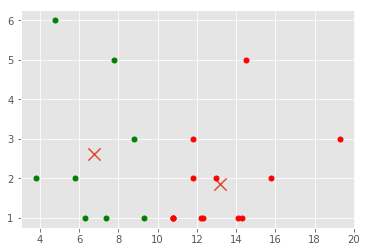

labels : [1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1]
centroids : [[  6.75         2.625        0.81875      0.5       ]
 [ 13.19230769   1.84615385   2.52461538   0.46153846]]


In [149]:
#***************************************************************************************************************
#Clustering ==> KMeans
#***************************************************************************************************************


X = np.array(dt[['Total Amount', 'Passenger Count', 'Trip Distance (in miles)', 'Surcharge']])
y = np.array(dt['Generous ?'])

clf = KMeans(n_clusters= 2)
clf.fit(X,y)

centroids = clf.cluster_centers_
labels = clf.labels_


colors = ["g.", "r.", "b."]

for i in range(len(X)):
    plt.plot(X[i][0], X[i,1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s = 150, linewidths = 5)   
plt.show()


print("labels :", labels)
print("centroids :", centroids)
